In [30]:
# dataset : https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv
# 학생들의 점수가 어떤 factor와 상관관계가 있는지 확인해보기

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [32]:
df = pd.read_csv("./StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
# race/ethnicity : 인종과 민족성
# parental level of education : 부모학력
# lunch : 점심식사 여부 (standard - 보통점심 / free,reduced - 점심을 안먹거나 적게먹은것)
# test preparation course : 시험대비과목 이수여부 (completed / none)

In [34]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


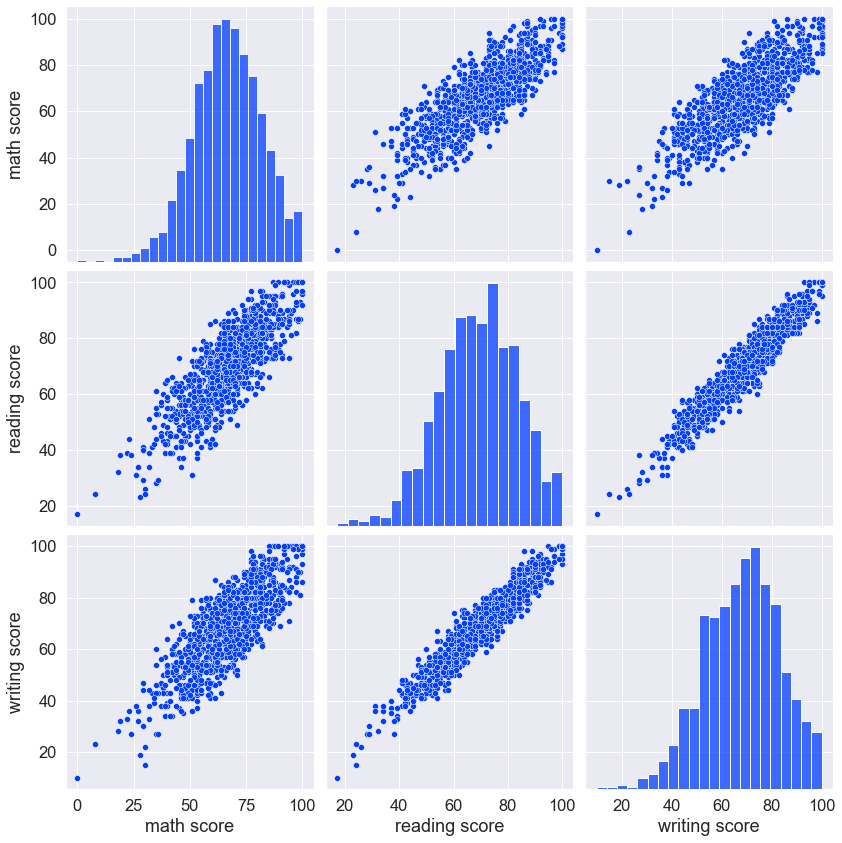

In [35]:
# 수학 / 읽기 / 쓰기 점수의 상관관계 확인
# 대각선은 막대그래프는 분포도

sns.pairplot(df[['math score', 'reading score', 'writing score']], height=4)

In [36]:
# 점수의 평균
def average_score(dt):
    return (dt['math score'] + dt['reading score'] + dt['writing score']) / 3

# dataframe에 평균함수를 일괄적으로 적용
df['average score'] = df.apply(average_score, axis=1)

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Text(0.5, 1.0, 'writing')

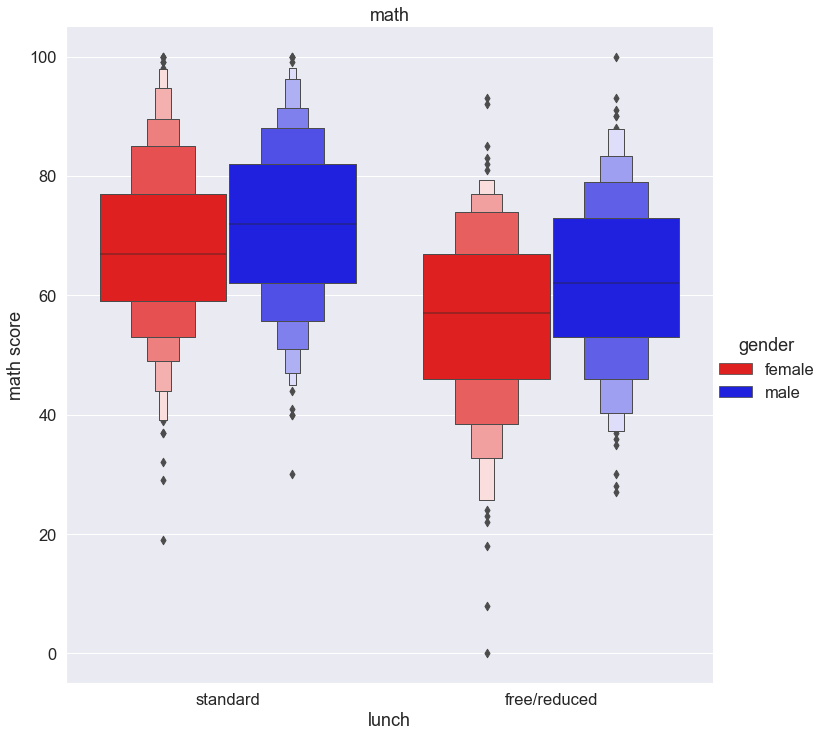

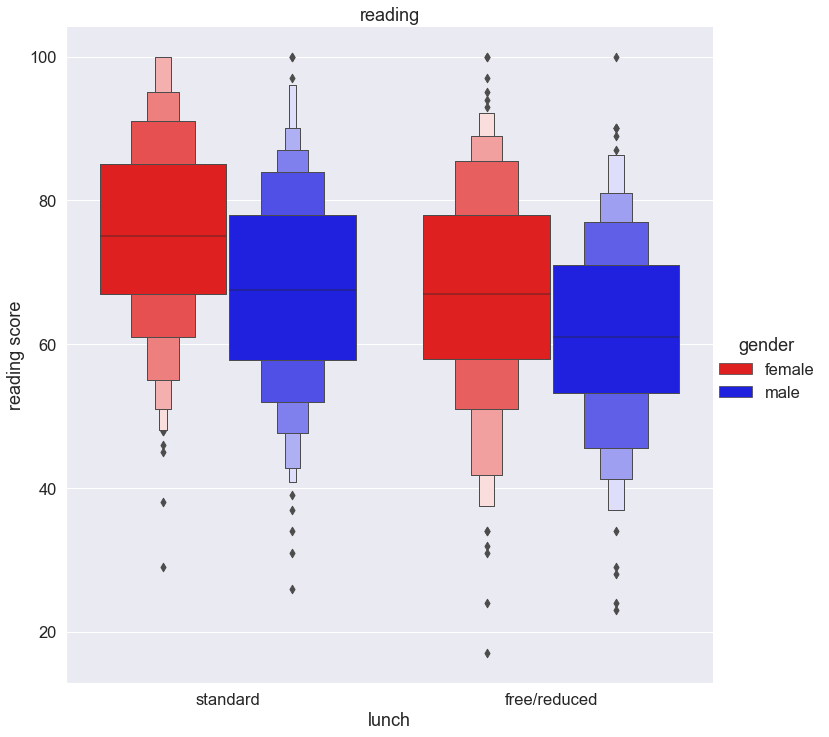

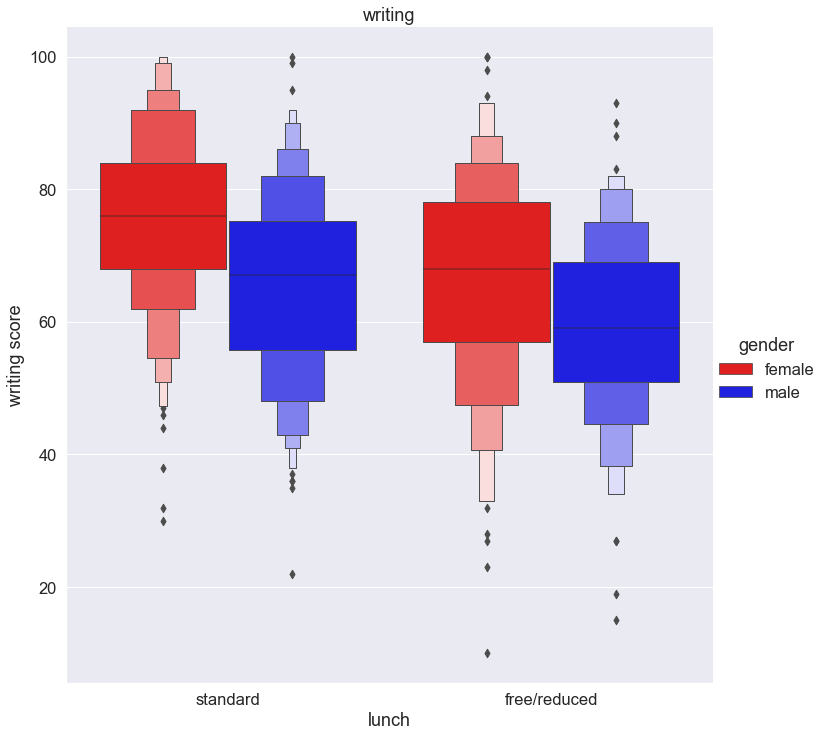

In [38]:
# seaborn.catplot : categorical plot
# 점심식사여부와 각과목의 성적의 연관성을 찾기
# x축 : 식사여부 / y축 : 과목별 점수 / gender별로 구분
# boxen : 대용량데이터 가시화에 좋은 형태

sns.catplot(x='lunch', y='math score', hue='gender', kind='boxen', 
            data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('math')

sns.catplot(x='lunch', y='reading score', hue='gender', kind='boxen', 
            data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('reading')

sns.catplot(x='lunch', y='writing score', hue='gender', kind='boxen', 
            data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('writing')

Text(0.5, 1.0, 'average')

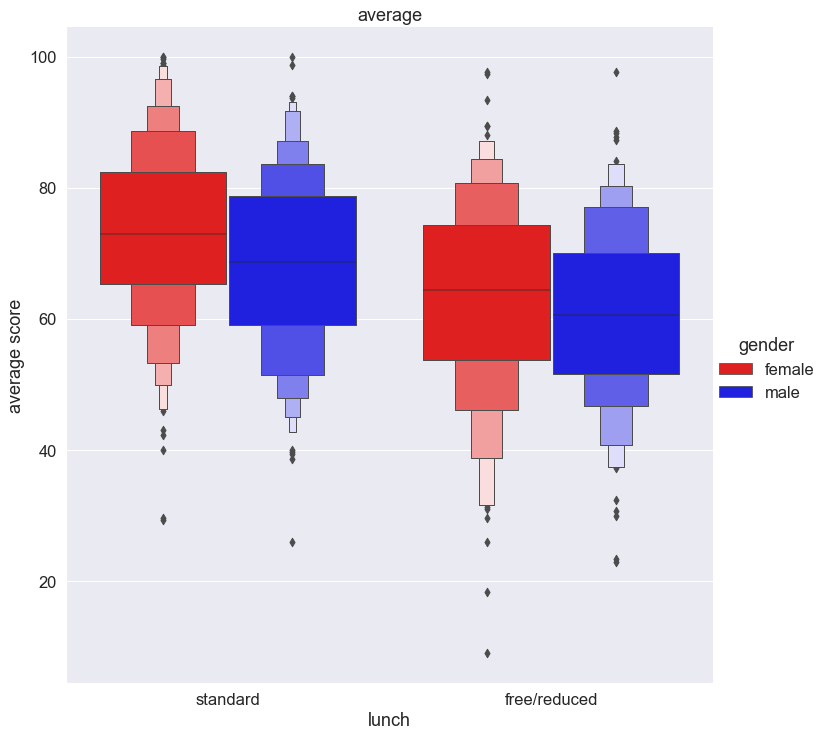

In [39]:
# 점심식사 여부와 평균점수의 상관정도를 비교

sns.catplot(x='lunch', y='average score', hue='gender', kind='boxen', 
            data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('average')

Text(0.5, 1.0, 'average')

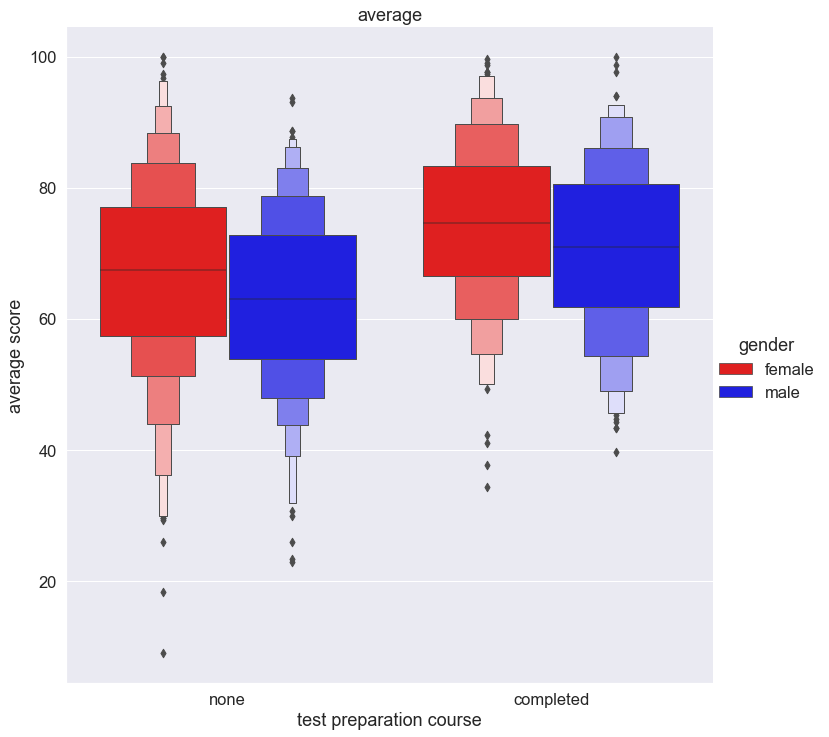

In [40]:
# 시험대비과목 이수여부와 평균점수와의 상관관계

sns.catplot(x='test preparation course', y='average score', hue='gender', kind='boxen', 
            data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('average')

No handles with labels found to put in legend.


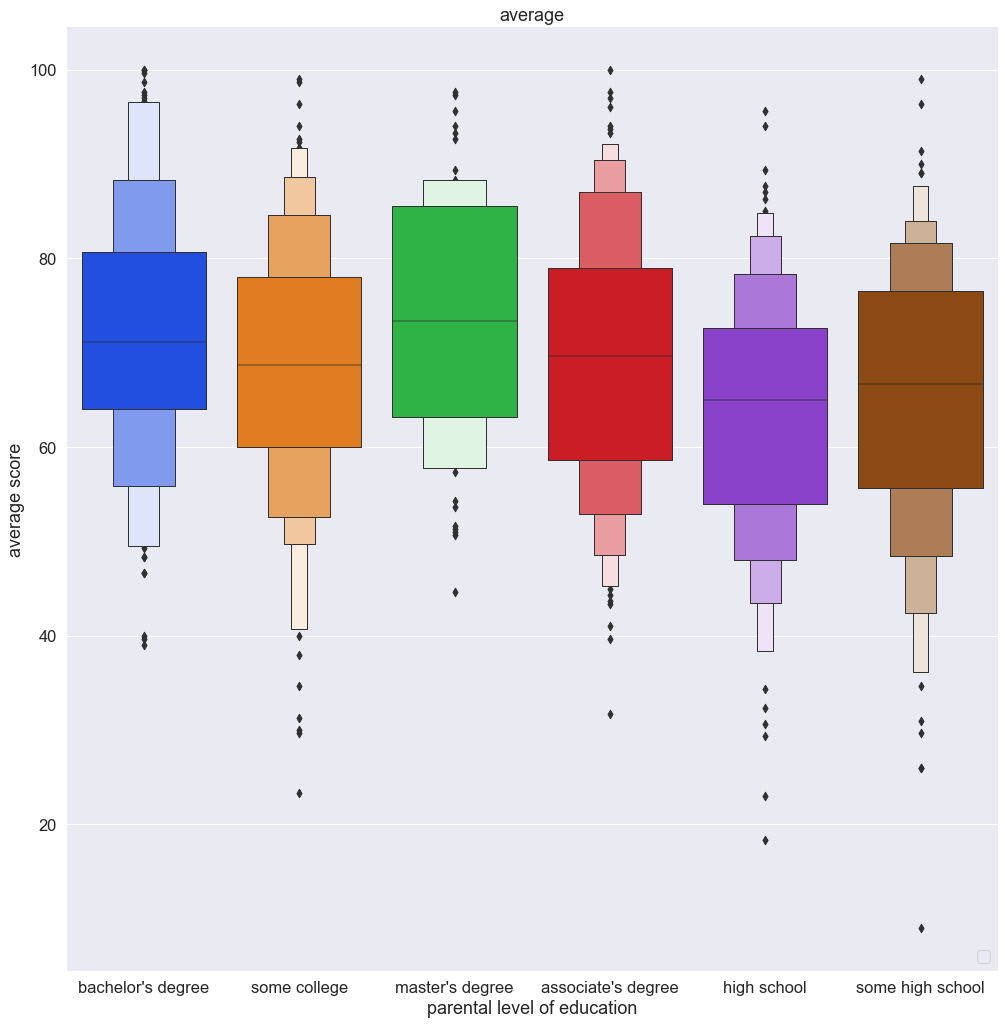

In [41]:
# 부모의 교육학력과 평균점수와의 상관관계

sns.catplot(x='parental level of education', y='average score', kind='boxen', data=df, height=14)
plt.title('average')
plt.legend(loc='lower right')